<a href="https://colab.research.google.com/github/cesaryuri/Cabueta-FakeNewsDetection/blob/main/A_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

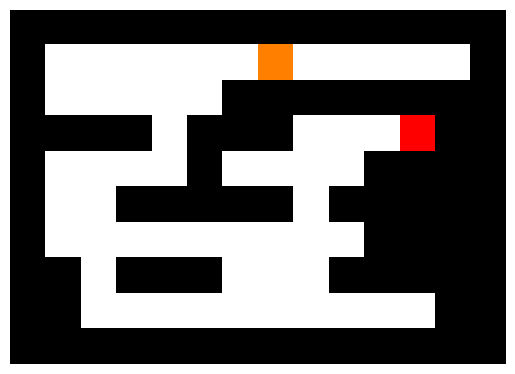

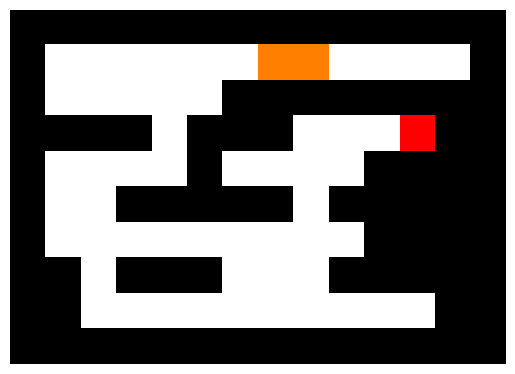

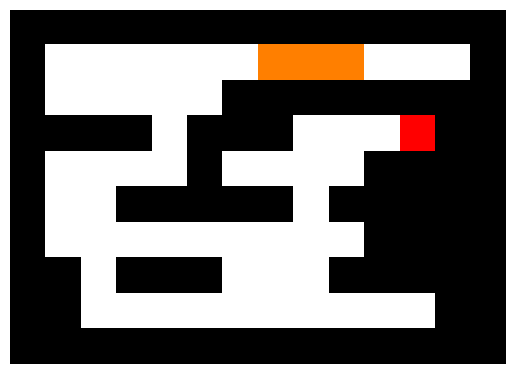

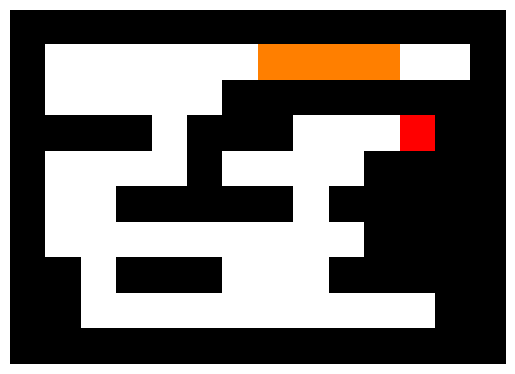

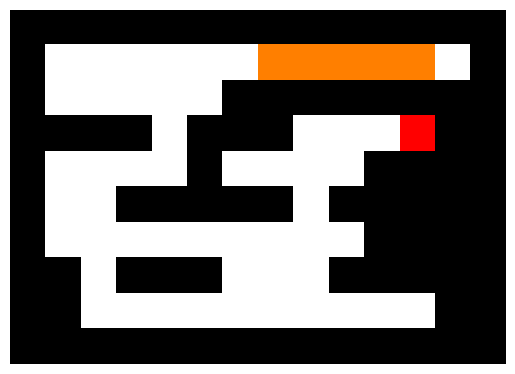

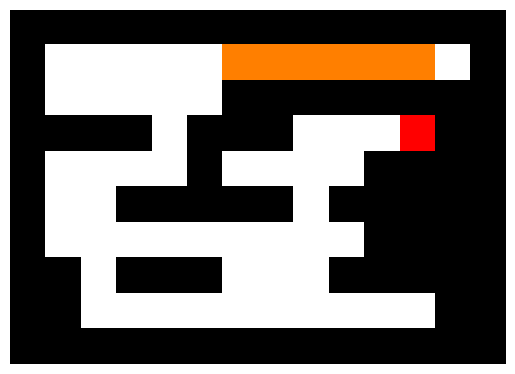

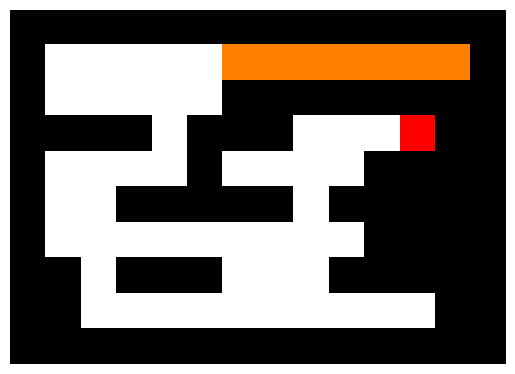

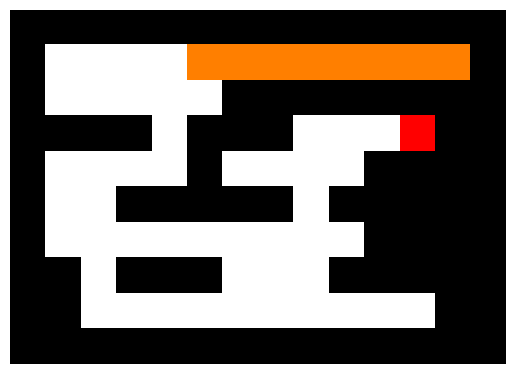

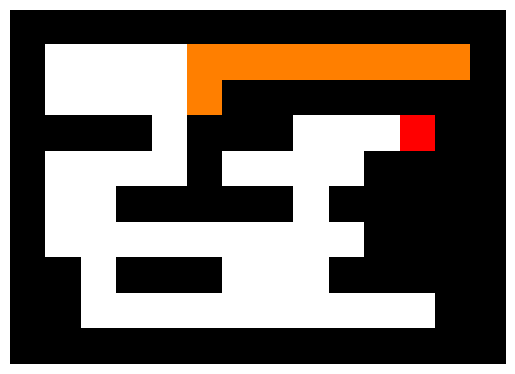

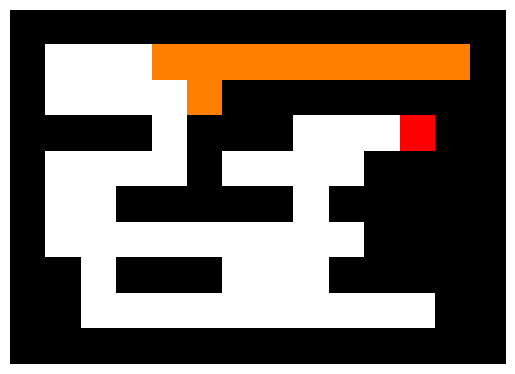

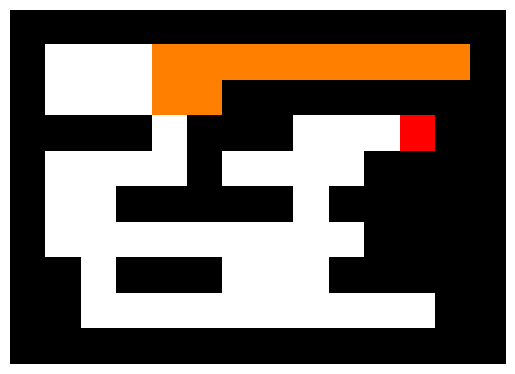

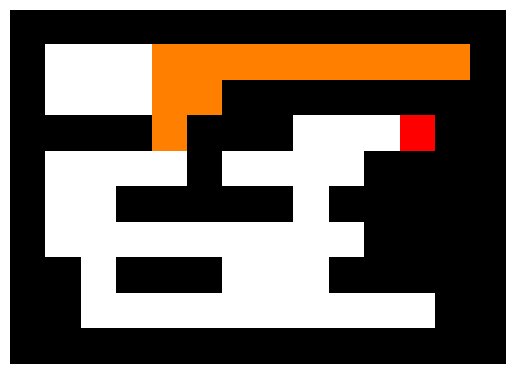

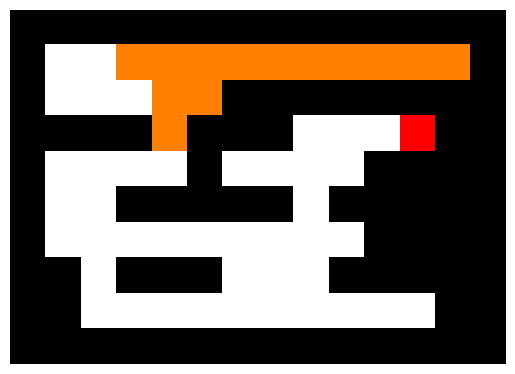

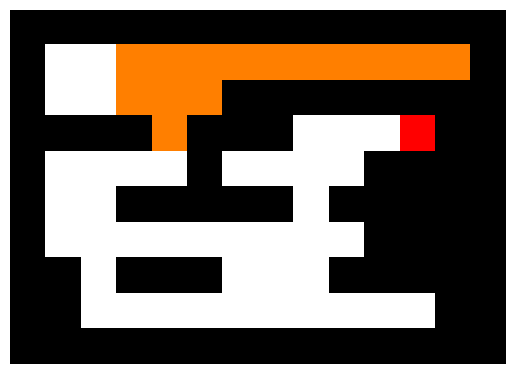

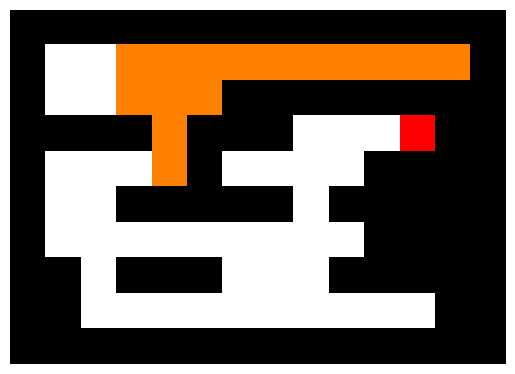

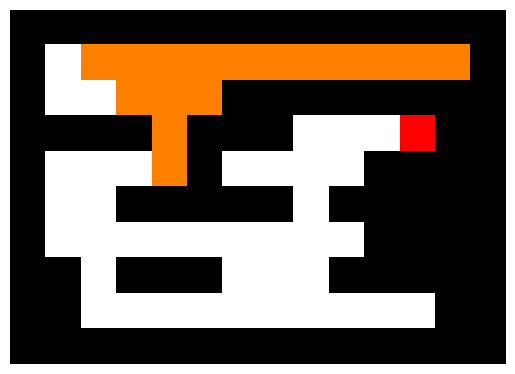

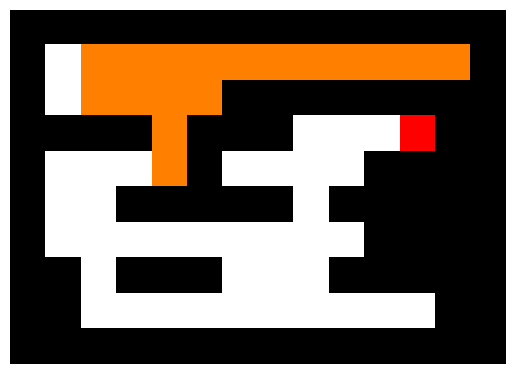

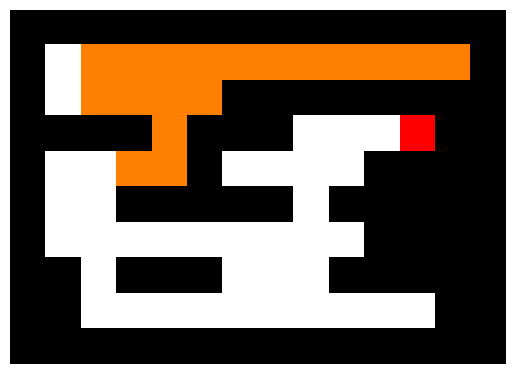

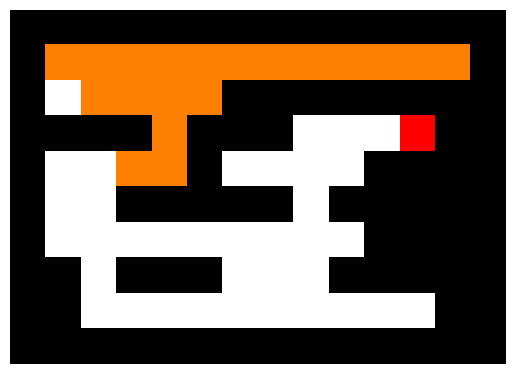

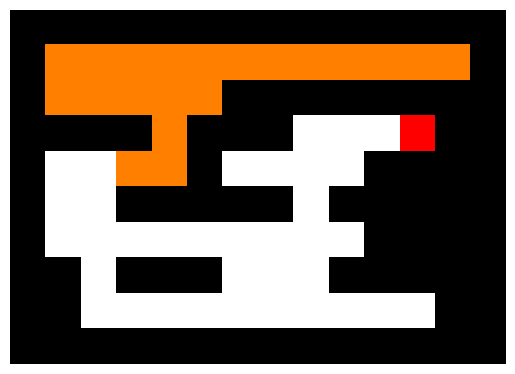

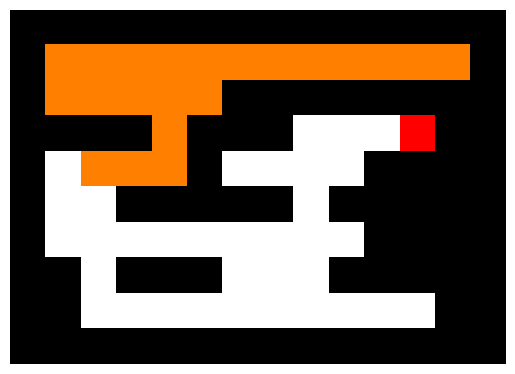

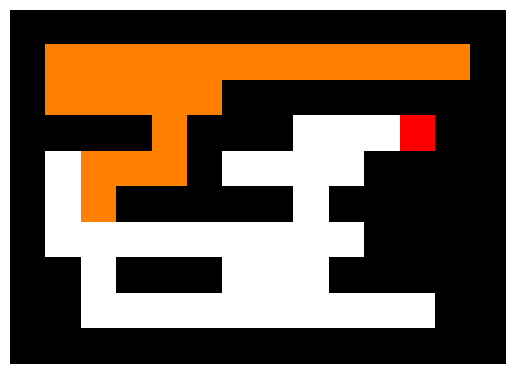

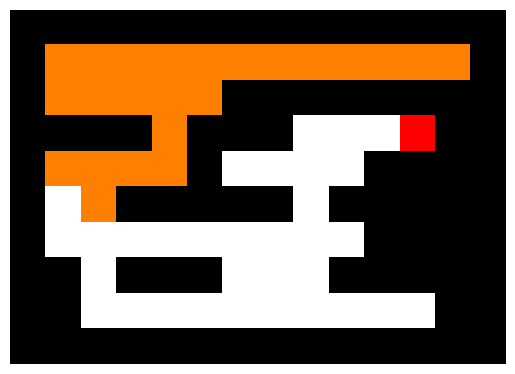

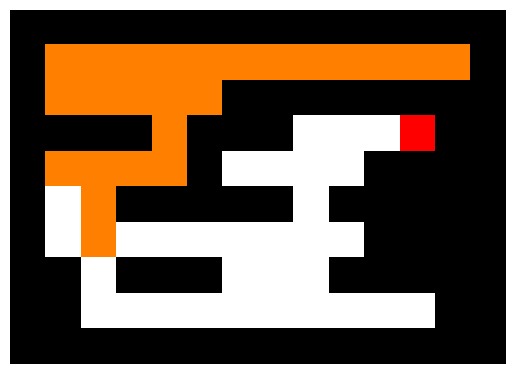

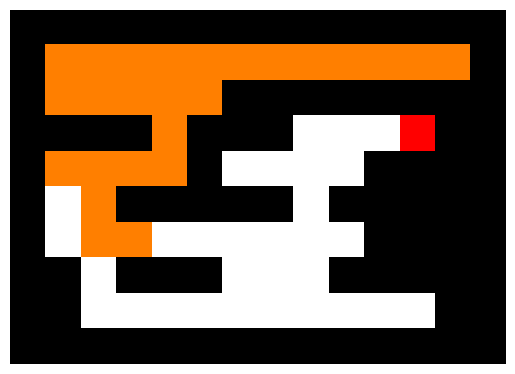

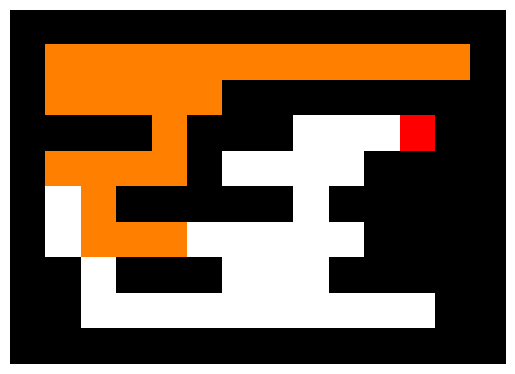

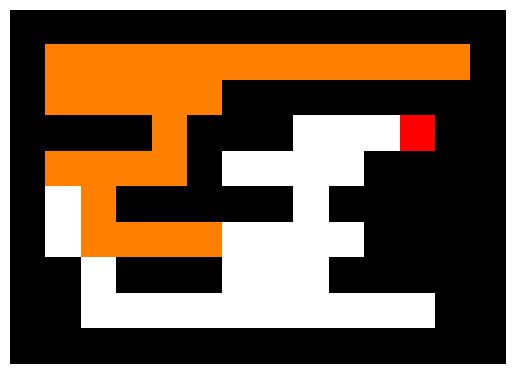

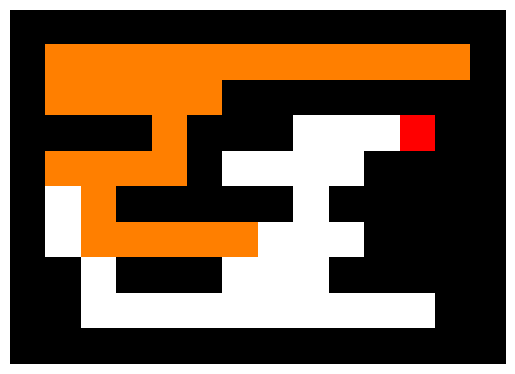

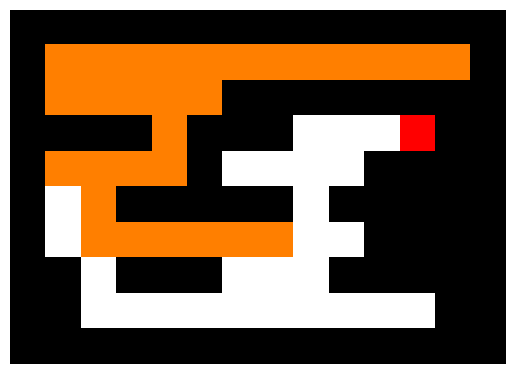

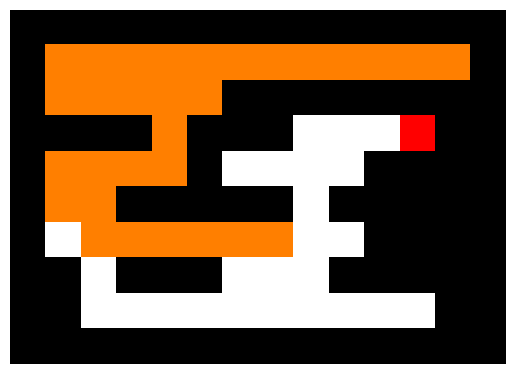

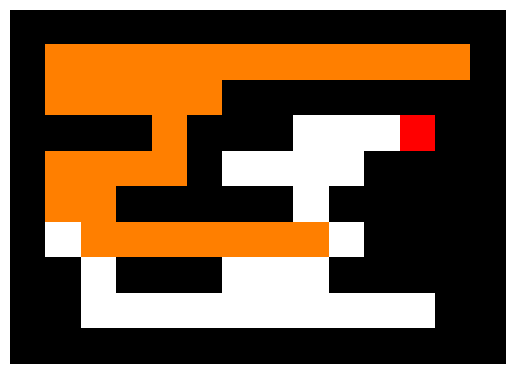

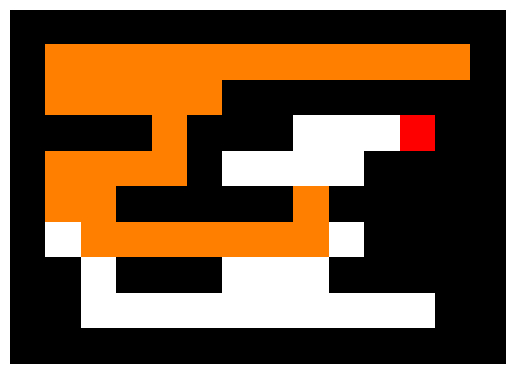

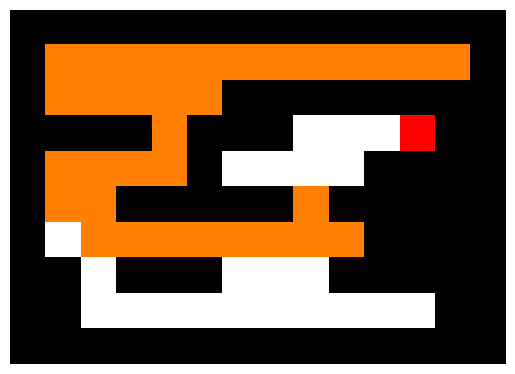

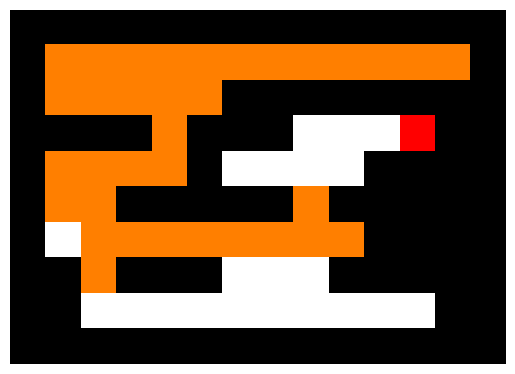

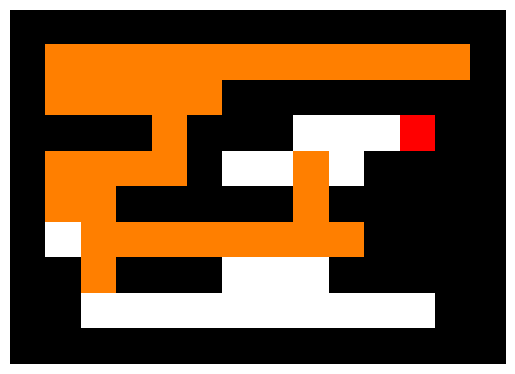

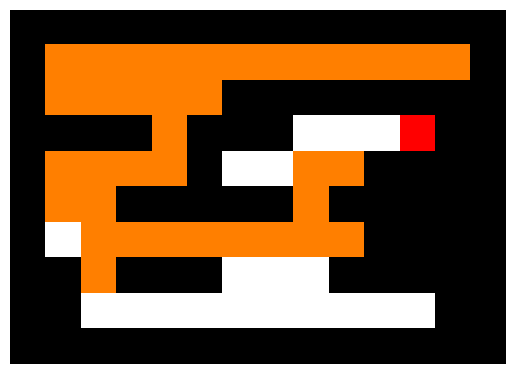

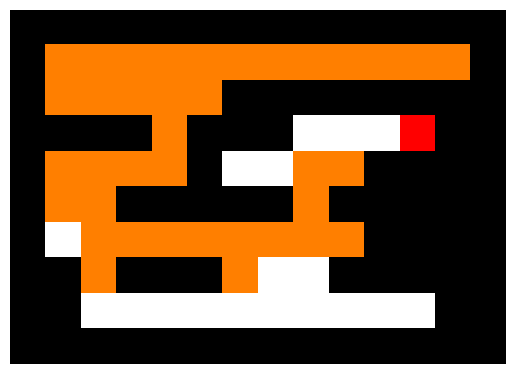

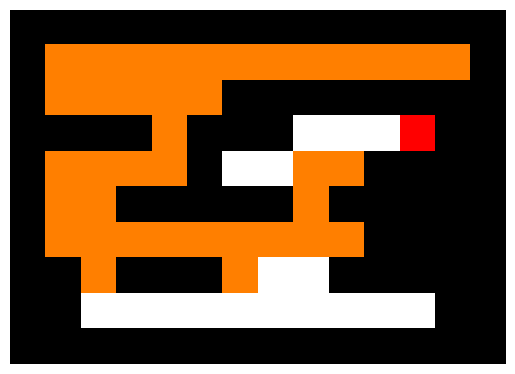

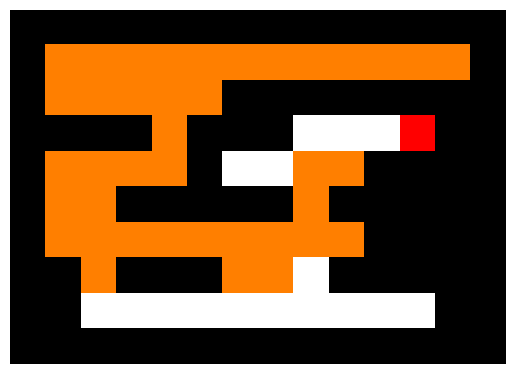

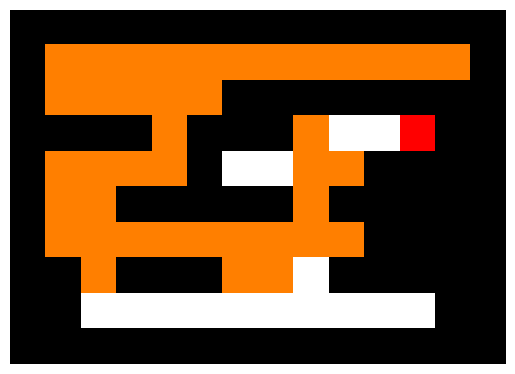

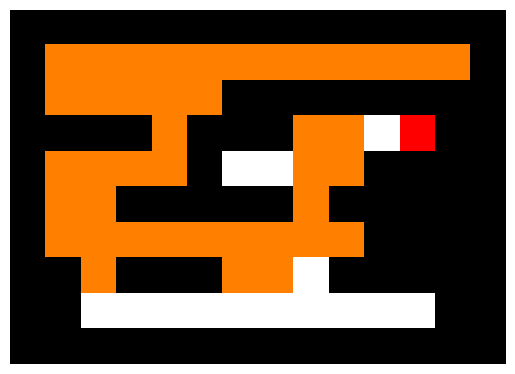

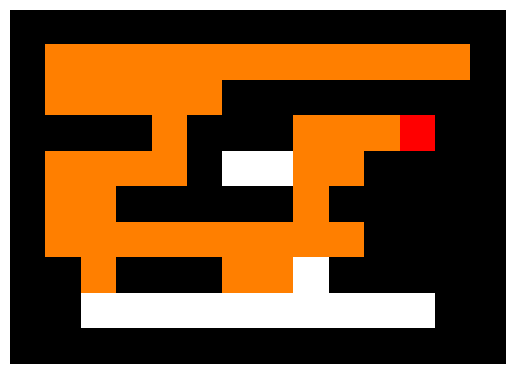

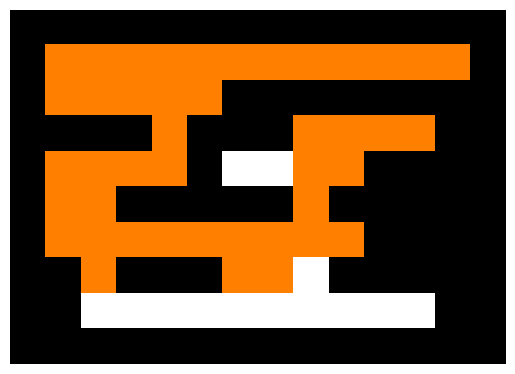

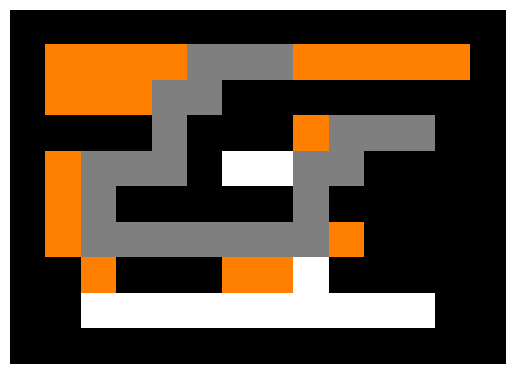

Caminho encontrado: [(1, 7), (1, 6), (1, 5), (2, 5), (2, 4), (3, 4), (4, 4), (4, 3), (4, 2), (5, 2), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (5, 8), (4, 8), (4, 9), (3, 9), (3, 10), (3, 11)]


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time

def cor_para_rgb(cor):
    return {
        'preto': (0, 0, 0),
        'branco': (1, 1, 1),
        'verde_limao': (0, 1, 0),
        'vermelho': (1, 0, 0),
        'cinza': (0.5, 0.5, 0.5),
        'laranja': (1, 0.5, 0)
    }[cor]

def mostrar_labirinto(labirinto, inicio, objetivo, visitados=[], caminho=[]):
    linhas, colunas = len(labirinto), len(labirinto[0])
    imagem = np.zeros((linhas, colunas, 3))
    cores = {'#': 'preto', 'S': 'verde_limao', 'G': 'vermelho', '.': 'branco'}

    for r in range(linhas):
        for c in range(colunas):
            imagem[r, c] = cor_para_rgb(cores.get(labirinto[r][c], 'branco'))

    for local in visitados:
        imagem[local[0], local[1]] = cor_para_rgb('laranja')
    for passo in caminho:
        imagem[passo[0], passo[1]] = cor_para_rgb('cinza')

    plt.imshow(imagem, interpolation='nearest')
    plt.axis('off')
    plt.show()
    time.sleep(0.1)

def distancia(a, b):
    return math.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

def achar_caminho(labirinto):
    inicio, objetivo = (None, None), (None, None)
    for r in range(len(labirinto)):
        for c in range(len(labirinto[0])):
            if labirinto[r][c] == 'S':
                inicio = (r, c)
            elif labirinto[r][c] == 'G':
                objetivo = (r, c)

    fronteira = [(distancia(inicio, objetivo), inicio)]
    veio_de = {inicio: None}
    custo = {inicio: 0}
    visitados = []

    while fronteira:
        fronteira.sort(reverse=True)
        custo_atual, atual = fronteira.pop()

        visitados.append(atual)
        mostrar_labirinto(labirinto, inicio, objetivo, visitados)

        if atual == objetivo:
            break

        r, c = atual
        for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            vizinho = (r + dr, c + dc)
            if 0 <= vizinho[0] < len(labirinto) and 0 <= vizinho[1] < len(labirinto[0]) and labirinto[vizinho[0]][vizinho[1]] != '#':
                novo_custo = custo[atual] + 1
                if vizinho not in custo or novo_custo < custo[vizinho]:
                    custo[vizinho] = novo_custo
                    prioridade = novo_custo + distancia(vizinho, objetivo)
                    fronteira.append((prioridade, vizinho))
                    veio_de[vizinho] = atual

    caminho = []
    while atual:
        caminho.append(atual)
        atual = veio_de[atual]
    caminho.reverse()

    mostrar_labirinto(labirinto, inicio, objetivo, visitados, caminho)
    return caminho

labirinto = [
    "##############",
    "#......S.....#",
    "#.....########",
    "####.###...G##",
    "#....#....####",
    "#..#####.#####",
    "#.........####",
    "##.###...#####",
    "##..........##",
    "##############"
]

caminho = achar_caminho(labirinto)
print("Caminho encontrado:", caminho)
